# 2018 Bar Chart

In [1]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#read in 2018
clean_data1 =pd.read_csv("Boston Property Assesment2018.csv")
clean_data1.head()

C:\Users\savan\AppData\Local\Temp\ipykernel_14640\2840788937.py:2: DtypeWarning: Columns (15,40) have mixed types. Specify dtype option on import or set low_memory=False.
  clean_data1 =pd.read_csv("Boston Property Assesment2018.csv")


,PID,CM_ID,GIS_ID,ST_NUM,ST_NAME,ST_NAME_SUF,UNIT_NUM,ZIPCODE,PTYPE,LU,...,U_BTH_STYLE2,U_BTH_STYLE3,U_KITCH_TYPE,U_KITCH_STYLE,U_HEAT_TYP,U_AC,U_FPLACE,U_INT_FIN,U_INT_CND,U_VIEW
0,100021000,NaN,100021000,243 HF,LEXINGTON,ST,NaN,2128,101,R1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100027000,NaN,100027000,33,PRESCOTT,ST,NaN,2128,101,R1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100033000,NaN,100033000,246,PRINCETON,ST,NaN,2128,101,R1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100041000,NaN,100041000,224,PRINCETON,ST,NaN,2128,101,R1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100052000,NaN,100052000,112,PUTNAM,ST,NaN,2128,101,R1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#change column name for consistency 
cleandf2 = clean_data1.rename(columns={'AV_TOTAL': 'TOTAL_VALUE'}) 

In [4]:
#pull out useful columnns
useful_boston1 = cleandf2[['OWNER','OWN_OCC','TOTAL_VALUE','GROSS_TAX','YR_BUILT']]
useful_boston1.head()

,OWNER,OWN_OCC,TOTAL_VALUE,GROSS_TAX,YR_BUILT
0,CIOTO ROBERT M,Y,213200,223433,1910
1,BUENROSTRO ROGELIO,Y,341700,358102,1900
2,MARSIGLIA MARILYN G,Y,337800,354015,1920
3,BATRES MARCO TULIO SOLA,Y,334200,350242,1900
4,SANSEVERINO LOUIS T,N,189700,198806,1900


In [5]:
#filter out those NOT owner occupied
owner_occ = useful_boston1[useful_boston1['OWN_OCC'] == 'Y']
owner_occ.head()

,OWNER,OWN_OCC,TOTAL_VALUE,GROSS_TAX,YR_BUILT
0,CIOTO ROBERT M,Y,213200,223433,1910
1,BUENROSTRO ROGELIO,Y,341700,358102,1900
2,MARSIGLIA MARILYN G,Y,337800,354015,1920
3,BATRES MARCO TULIO SOLA,Y,334200,350242,1900
5,BURROUGHS RICHARD P,Y,310900,325824,1900


In [6]:
#create bins
size_bins = [0, 249999, 499999, 749999, 999999, 1249999, 1499999, 1749999, 1999999, 2249999, 24999999, 1000000000]
group_names = ["Under 250k", "250k-500k", "500k-750k", "750k-1M", "1M-1.25M", "1.25M-1.5M", "1.5M-1.75M", "1.75M-2M", "2M-2.25M", "2.25M-2.5M", "Over 2.5M"]

In [7]:
owner_occ["Price Bins"] =  pd.cut(owner_occ["TOTAL_VALUE"], size_bins, labels=group_names)
owner_occ

C:\Users\savan\AppData\Local\Temp\ipykernel_14640\2789541579.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  owner_occ["Price Bins"] =  pd.cut(owner_occ["TOTAL_VALUE"], size_bins, labels=group_names)


,OWNER,OWN_OCC,TOTAL_VALUE,GROSS_TAX,YR_BUILT,Price Bins
0,CIOTO ROBERT M,Y,213200,223433,1910,Under 250k
1,BUENROSTRO ROGELIO,Y,341700,358102,1900,250k-500k
2,MARSIGLIA MARILYN G,Y,337800,354015,1920,250k-500k
3,BATRES MARCO TULIO SOLA,Y,334200,350242,1900,250k-500k
5,BURROUGHS RICHARD P,Y,310900,325824,1900,250k-500k
...,...,...,...,...,...,...
30561,HERNANDEZ CLAIRE,Y,557700,584470,1932,500k-750k
30562,SZABO DEREK P,Y,544700,570846,1920,500k-750k
30563,KAPILIAN RALPH H TS,Y,591600,619997,1920,500k-750k
30565,HURWITCH SANDRA LEE,Y,622700,652590,1920,500k-750k


In [8]:
#get a total count for each bin
binned_prices = owner_occ.groupby(["Price Bins"]).count()["TOTAL_VALUE"]
binned_prices

Price Bins
Under 250k      873
250k-500k     16100
500k-750k      6038
750k-1M        1356
1M-1.25M        392
1.25M-1.5M      183
1.5M-1.75M      145
1.75M-2M        120
2M-2.25M         70
2.25M-2.5M      432
Over 2.5M         0
Name: TOTAL_VALUE, dtype: int64

In [9]:
#find median home value
median = owner_occ['TOTAL_VALUE'].median()
median

print("The median home value in 2018 was $",median)

The median home value in 2018 was $ 431400.0


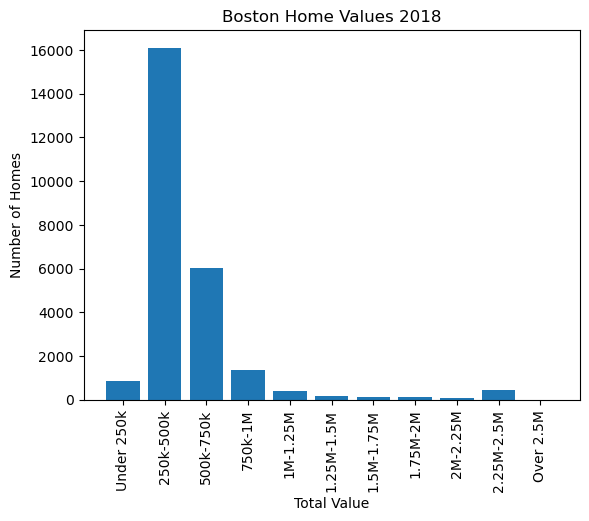

In [10]:
#Chart home values
x_axis = np.arange(len(group_names))
tick_locations = [value for value in x_axis]

plt.bar(x_axis, binned_prices)
plt.xticks(tick_locations, group_names, rotation="vertical")
plt.xlabel("Total Value")
plt.ylabel("Number of Homes")
plt.title("Boston Home Values 2018")
plt.show()